## Instructions:
- This is a simple **.ipynb** file just run it in **jupyter notebook** to show the animation. It will be better if this program is run in a **file** because jupyter notebook sometimes *hangs* while working with animations.
- The program is divided into different function so the previous block of code is required for getting the correct output.
- Run the code serially to get the desired output.

## Basic Idea
From the video posted on moodle it is clear that one of the vertices of the polygon has the same position at every instant. This point is (1,0). <br>
All the other vertices except (1,0) split into two and converge towards the vertices of the bigger polygon. This animation also reverses itslef. <br>
So the figure goes like 3 -> 4 -> 5 -> 6-> 7-> 8 -> 7 -> 6 -> 5 -> 4 -> 3.
<br><br>
To get the corner vertices we could use the concept of complex roots of unity.
So nth root (corresponding to n sized polygon) can be calculated using `Euler's Formula` i.e.
- x=cos(  (k/n) * (2*pi)  )
- y=sin(  (k/n) * (2*pi)  ) 
<br>
where k goes from 0 to n-1.

## Import
Importing the required Libraries like Numpy, Matplotlib and the function Funcanimation.

In [1]:
# Magic command below to enable interactivity in the JupyterLab interface
%matplotlib ipympl
# Some basic imports that are useful
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


## User defined Functions
I have created some functions that will help in plotting.
- `circle(t)` : takes a numpy array as input and returns 2 arrays having x and y coordinates for the circle. <br>
- `get_corners(n)` : takes n as the number of sides of the polygon and returns two lists having x and y coordinates of the corners for the particular polygon. This is done by calculating the roots of unity.
- `get_smaller_shape(n)` : takes n as the number of sides of the polygon and makes the polygon by returning the x and y cordinate arrays of vertices. Note that some of the verties are repeated. Explanation available below.
- `get_bigger_shape(n)` : takes n as the number of sides of the polygon and makes the polygon by returning the x and y cordinate arrays of vertices. Note that some of the verties are repeated. Explanation available below.
<br><br>
The difference between the get_smaller_shape() and get_bigger_shape() is that the repetition of the vertices is different so that the vertex of smaller polygon splits into two and converges to the vertex of the bigger polygon.
<br><br>
For example: Consider the case of **Triangle** to **Square**. Say the edges of triangle are A,B,C and those of the square are P,Q,R,S. (common vertex begin A and P) <br><br>
Mapping of the vertices is like:
- A -> P
- B -> Q
- B -> R
- C -> R
- C -> S
- A -> P
<br><br>So the Shape Arrays will be
- triangle : [A,B,B,C,C,A]
- square : [P,Q,R,R,S,P]
<br>Other cases also have the simillar shape distribution.


In [2]:
def circle(t):
    return np.cos(t), np.sin(t)
def get_corners(n):
    pts=np.asarray([j for j in range(n)])
    xm=np.cos(pts*(2*np.pi/n))
    ym=np.sin(pts*(2*np.pi/n))
    return xm,ym
def get_smaller_shape(n):
    xm,ym=get_corners(n)
    x=np.asarray(xm[0])
    y=np.asarray(ym[0])
    for i in range(1,n):
        x=np.append(x,xm[i])
        x=np.append(x,xm[i])
        y=np.append(y,ym[i])
        y=np.append(y,ym[i])
    x=np.append(x,xm[0])
    y=np.append(y,ym[0])
    return x,y
def get_bigger_shape(n):
    xm,ym=get_corners(n)
    x=np.asarray(xm[0])
    y=np.asarray(ym[0])
    x=np.append(x,xm[1])
    y=np.append(y,ym[1])
    for i in range(2,n-1):
        x=np.append(x,xm[i])
        x=np.append(x,xm[i])
        y=np.append(y,ym[i])
        y=np.append(y,ym[i])
    x=np.append(x,xm[n-1])
    y=np.append(y,ym[n-1])
    x=np.append(x,xm[0])
    y=np.append(y,ym[0])
    return x,y

Now using the Sir's code provided on moodle I just changed the frames and the morph function so that the integral value of the frame tells which transitioin is hapenning and the decimal part of the frame tells the alpha to be used for the linear combination of the 2 shapes.<br> Also for clarity I have changed the color of the diagram when a new shape forms.

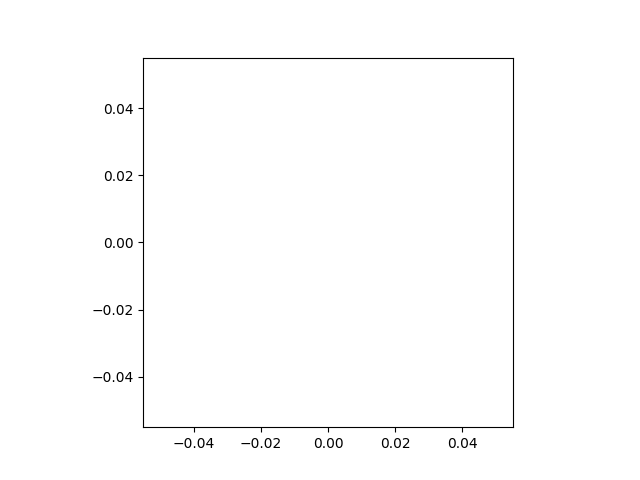

In [3]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')
ax.set_aspect('equal',adjustable='box')
colours=['red','blue','green','black','orange','orange','black','green','blue','red','red']
def init():
    #Set the Size of Plot.
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,
def update(frame):
    # Update the plot for this particular frame
    xdata, ydata = morph(frame)
    ln.set_data(xdata, ydata)
    ln.set_color(colours[int(frame)-1])
    return ln,
def morph(frame):
    if(frame < num):
        # Forward Transitions
        n=int(frame)
        x1,y1=get_smaller_shape(n+2)
        x2,y2=get_bigger_shape(n+3)
        alpha=frame-n
        xm = alpha * x2 + (1-alpha) * x1
        ym = alpha * y2 + (1-alpha) * y1
        return xm, ym
    else:
        # Backward Transitions
        n=int(frame)
        x1,y1=get_bigger_shape(2*num-n + 2)
        x2,y2=get_smaller_shape(2*num-n + 1)
        alpha=frame-n
        xm = alpha * x2 + (1-alpha) * x1
        ym = alpha * y2 + (1-alpha) * y1
        return xm, ym
num=6
# xc, yc = circle(np.linspace(0, 2*np.pi, 200))
# plt.plot(xc,yc)
ani = FuncAnimation(fig, update, frames=np.linspace(1, 2*num-1, (2*num-2)*500),
init_func=init, blit=True, interval=10, repeat=False)
plt.show()

We can uncomment the part of the code which makes Circle to verify the corners indeed lie on the Unit circle and hence the corners are the roots of unity.
If we don't what to change the color then just uncomment the part **ln.set_color(colours[int(frame)-1])** in the init() function. This will generate the animation just equivalent to that posted on the moodle.